In [1]:
#用faker库,构建一个数据集，如果没有，需要提前安装 pip install Faker
import pandas as pd
from   faker import Faker
fake = Faker(locale='zh_CN')

import pandas as pd
df = pd.DataFrame({
    'uid':['uid_'+str(fake.random_digit()) for i in range(0,12)],
    'Ip':[fake.ipv4() for i in range(0,6)]*2
     })
df


,uid,Ip
0,uid_0,154.138.139.183
1,uid_9,87.245.177.238
2,uid_7,103.113.47.165
3,uid_3,94.154.153.197
4,uid_9,104.255.162.198
5,uid_4,121.84.54.122
6,uid_7,154.138.139.183
7,uid_2,87.245.177.238
8,uid_4,103.113.47.165
9,uid_9,94.154.153.197


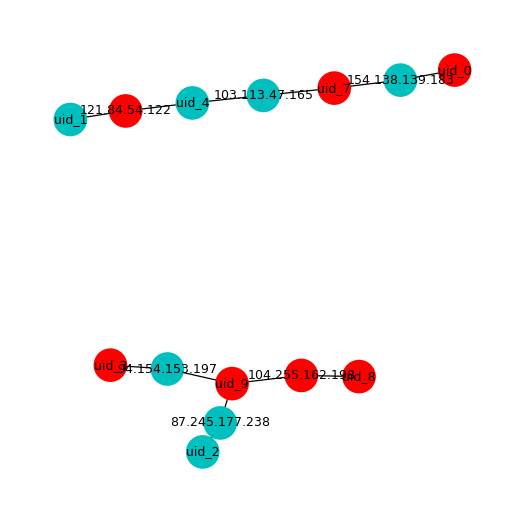

In [2]:



# 可视化我们的数据集
import networkx as nx
import matplotlib.pyplot as plt


# 对数据可视化
da = df.values
G  = nx.Graph()
for num in range(len(da)):
    G.add_edge(str(da[num,0]),str(da[num,1]))


#显示该graph-kamada_kawai_layout
colors = ['r','c']*60
colors = colors[0:len(G.nodes())]



#使用 spring_layout 布局
plt.figure(figsize=(2,2),dpi=300)
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 node_size=50,
                 font_size=3,
                 width = 0.3,
                 alpha=1
                 )
#plt.title("spring_layout")
plt.axis('off')
plt.show()



<Figure size 900x900 with 0 Axes>

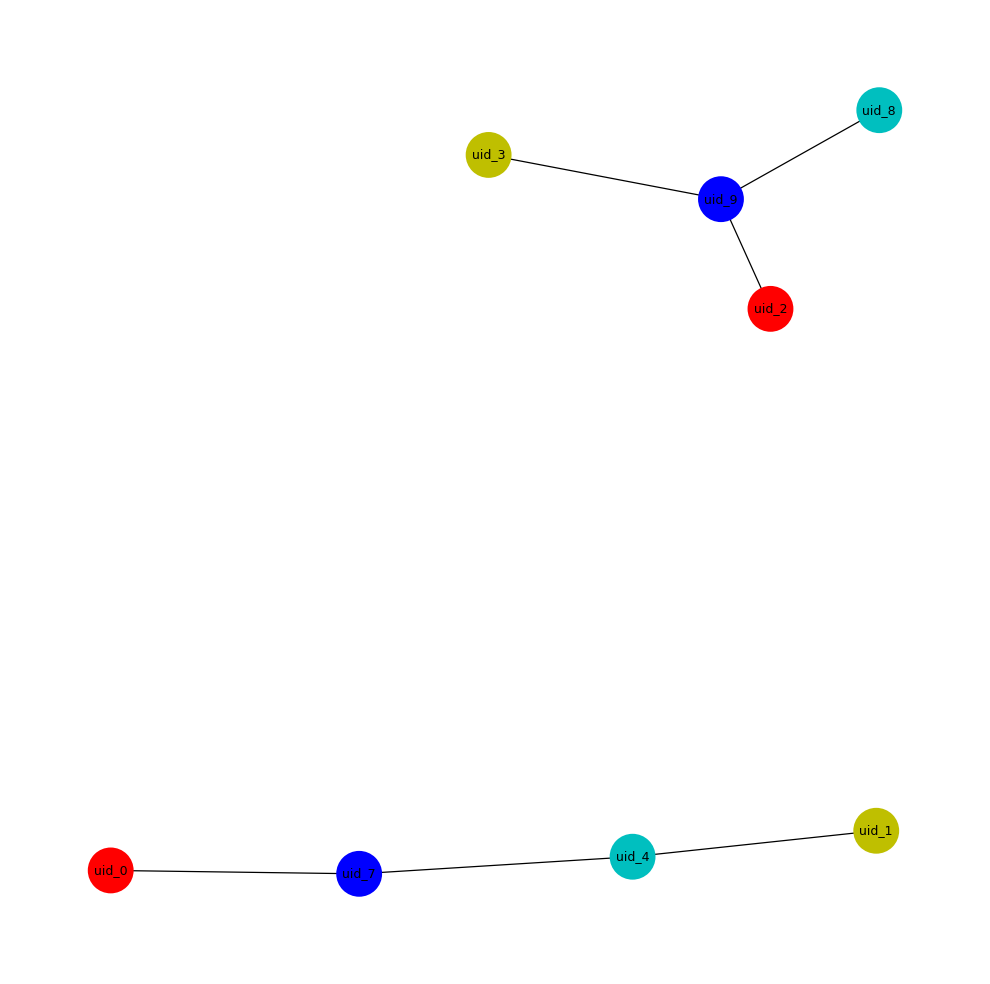

In [3]:


# 二部图转同构图
dm   = pd.merge(df,df,on='Ip',how='inner')

last = dm.groupby(['uid_x','uid_y']).agg({'Ip': pd.Series.nunique}).reset_index()

last = last[last['uid_x']!=last['uid_y']]

last


#结果数据转换成图格式
da = last[['uid_x','uid_y']].values
G  = nx.Graph()
for num in range(len(da)):
    G.add_edge(str(da[num,0]),str(da[num,1]))


#颜色、尺寸数据配置
plt.figure(figsize=(3,3),dpi=300)
colors = ['r','b','y','c']*6
colors = colors[0:len(G.nodes())]


#使用 spring_layout 布局
plt.figure(figsize=(4,4),dpi=300)
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 node_size=100,
                 font_size=3,
                 width = 0.3,
                 alpha=1
                 )
#plt.title("spring_layout")
plt.axis('off')
plt.show()


<Figure size 600x600 with 0 Axes>

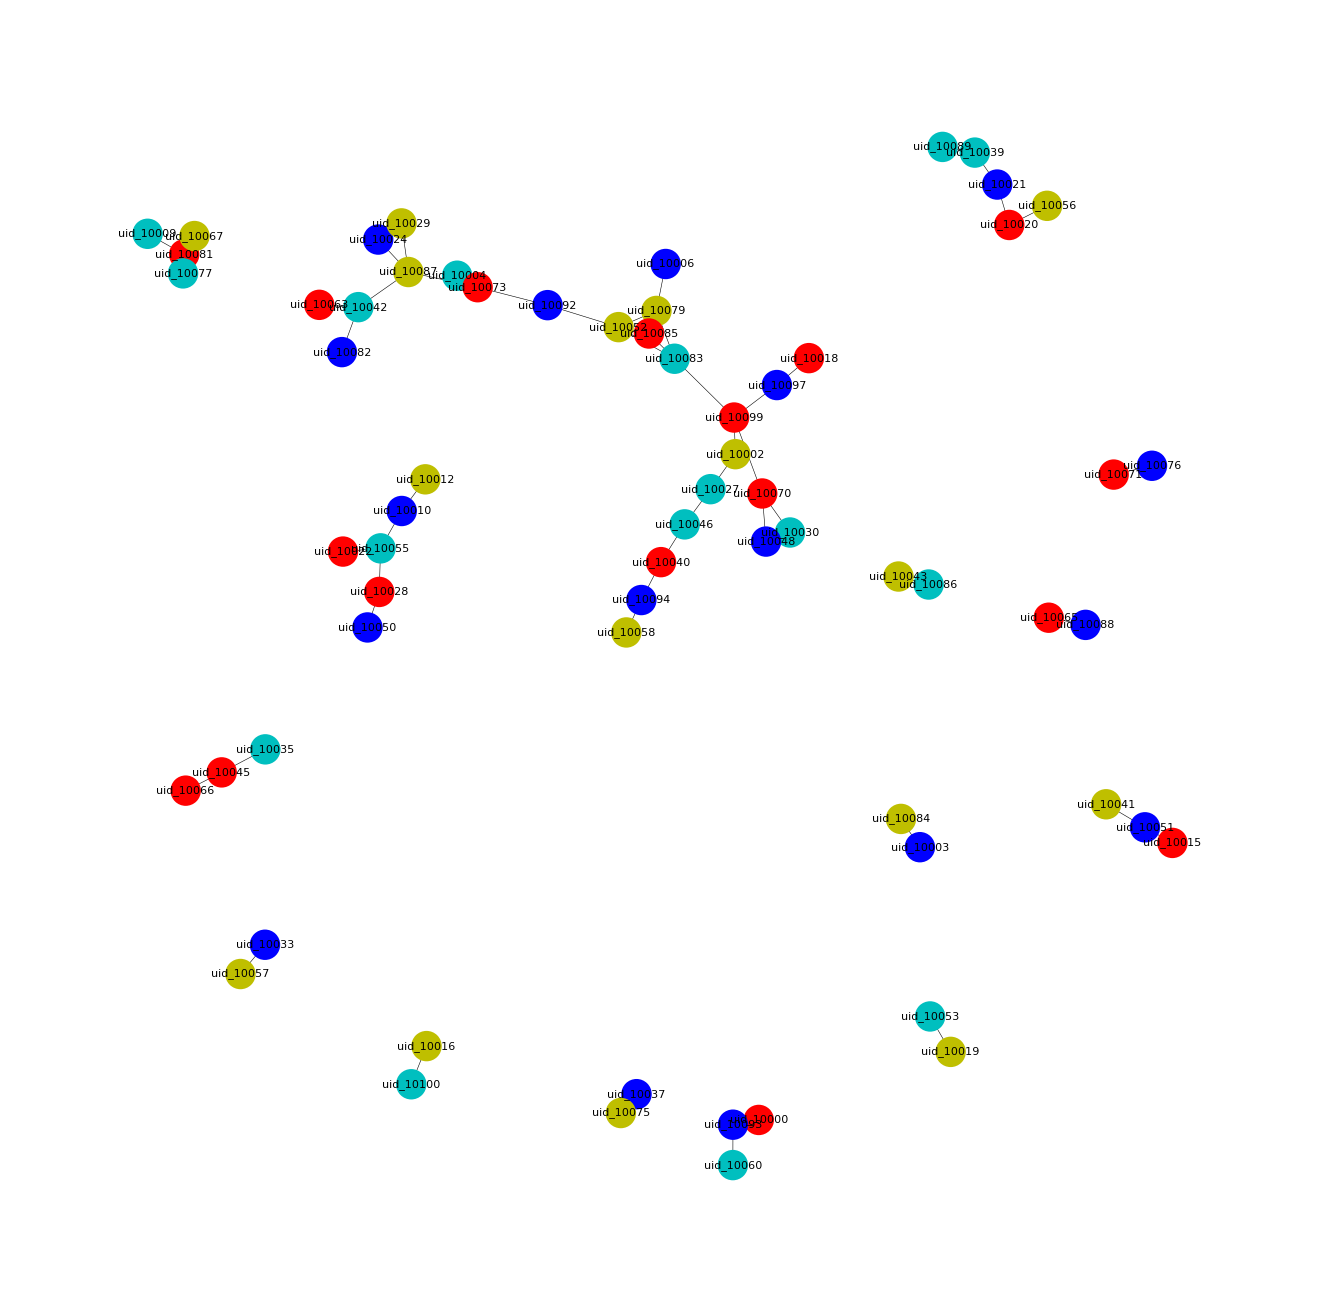

[{'uid_10093', 'uid_10060', 'uid_10000'}, {'uid_10094', 'uid_10024', 'uid_10030', 'uid_10002', 'uid_10018', 'uid_10070', 'uid_10079', 'uid_10046', 'uid_10097', 'uid_10099', 'uid_10052', 'uid_10027', 'uid_10004', 'uid_10048', 'uid_10040', 'uid_10058', 'uid_10092', 'uid_10006', 'uid_10083', 'uid_10087', 'uid_10029', 'uid_10082', 'uid_10073', 'uid_10085', 'uid_10042', 'uid_10063'}, {'uid_10084', 'uid_10003'}, {'uid_10081', 'uid_10009'}, {'uid_10055', 'uid_10012', 'uid_10022', 'uid_10050', 'uid_10028', 'uid_10010'}, {'uid_10051', 'uid_10041', 'uid_10015'}, {'uid_10100', 'uid_10016'}, {'uid_10019', 'uid_10053'}, {'uid_10089', 'uid_10021', 'uid_10020', 'uid_10039', 'uid_10056'}, {'uid_10057', 'uid_10033'}, {'uid_10045', 'uid_10035', 'uid_10066'}, {'uid_10037', 'uid_10075'}, {'uid_10086', 'uid_10043'}, {'uid_10065', 'uid_10088'}, {'uid_10077', 'uid_10067'}, {'uid_10076', 'uid_10071'}]


,object_id
group_id,
1,26
4,6
8,5
0,3
5,3
10,3
2,2
3,2
6,2


In [4]:


###################################################################
## 更复杂的数据试验

#用faker库,构建一个数据集，如果没有，需要提前安装 pip install Faker
import pandas as pd
from   faker import Faker
fake = Faker(locale='zh_CN')

import pandas as pd
df = pd.DataFrame({
    'uid':['uid_'+str(fake.random_int(10000, 10100)) for i in range(0,100)],
    'Ip':['em_'+fake.email() for i in range(0,50)]*2
     })
df

# 二部图转同构图
dm   = pd.merge(df,df,on='Ip',how='inner')

last = dm.groupby(['uid_x','uid_y']).agg({'Ip': pd.Series.nunique}).reset_index()


last = last[last['uid_x']!=last['uid_y']]

last


da = last[['uid_x','uid_y']].values
G  = nx.Graph()
for num in range(len(da)):
    G.add_edge(str(da[num,0]),str(da[num,1]))


plt.figure(figsize=(2,2),dpi=300)
colors = ['r','b','y','c']*60
colors = colors[0:len(G.nodes())]

    
#使用spring_layout布局
plt.figure(figsize=(4,4),dpi=400)
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 node_size=20,
                 font_size=2,
                 width=0.1,
                 alpha=1
                 )
#plt.title("spring_layout")
plt.axis('off')
plt.show()

# 找到所有连通子图
com = list(nx.connected_components(G))

# 打印看看什么格式的，可以看到得到的结果为列表-字典格式
print(com)

# 将 列表-字典 整理成数据表格形式
df_com  = pd.DataFrame()
for i in range(0, len(com)):
    d = pd.DataFrame({'group_id': [i] * len(com[i]), 'object_id': list(com[i])})
    df_com = pd.concat([df_com,d])

# 查看数据结果
df_com

# 统计每个团伙人数 并降序
df_com.groupby('group_id').count().sort_values(by='object_id', ascending=False) 